# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 642


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
#code here
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID="+weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #code
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #code here
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | kaeo
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | kirensk
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | baijiantan
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ca mau
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | road town
Pr

In [14]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lon           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,-17.64,90,7,1.58,CA,1681071228
1,sao joao da barra,-21.6403,-41.0511,23.05,89,100,5.49,BR,1681071480
2,ilulissat,69.2167,-51.1000,-2.99,86,100,0.00,GL,1681071480
3,iqaluit,63.7506,-68.5145,-18.15,65,20,4.63,CA,1681071480
4,castro,-24.7911,-50.0119,19.57,85,64,2.21,BR,1681071256


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,-17.64,90,7,1.58,CA,1681071228
1,sao joao da barra,-21.6403,-41.0511,23.05,89,100,5.49,BR,1681071480
2,ilulissat,69.2167,-51.1000,-2.99,86,100,0.00,GL,1681071480
3,iqaluit,63.7506,-68.5145,-18.15,65,20,4.63,CA,1681071480
4,castro,-24.7911,-50.0119,19.57,85,64,2.21,BR,1681071256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

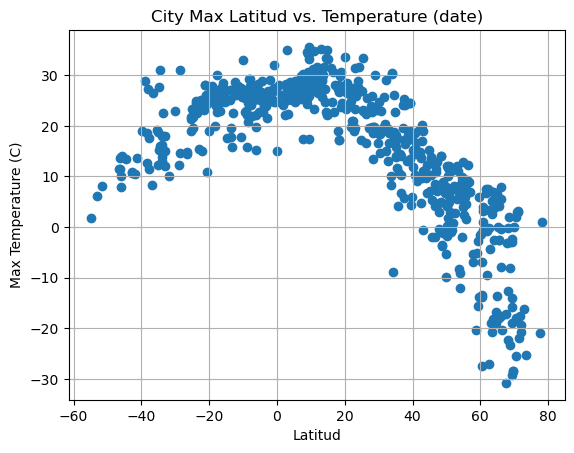

In [22]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Max Latitud vs. Temperature (date)')
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

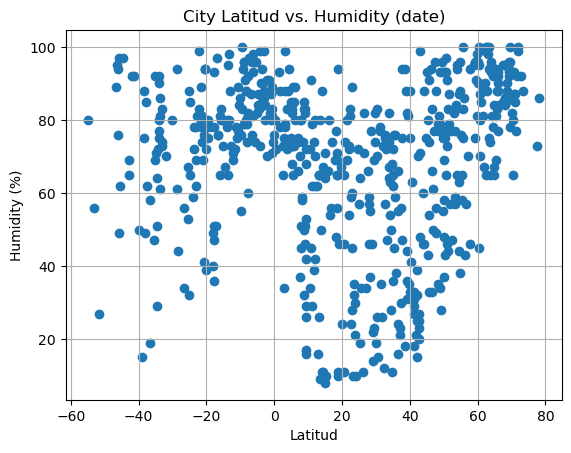

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values=city_data_df['Lat']
y_humidity=city_data_df['Humidity']
plt.scatter(x_values,y_humidity)
plt.title('City Latitud vs. Humidity (date)')
plt.xlabel('Latitud')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

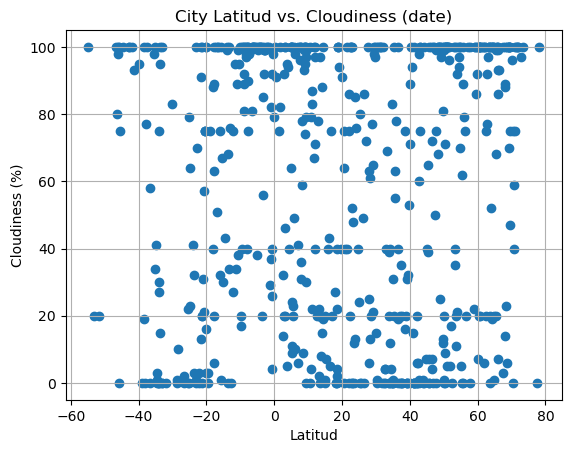

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values=city_data_df['Lat']
y_cloud=city_data_df['Cloudiness']
plt.scatter(x_values,y_cloud)
plt.title('City Latitud vs. Cloudiness (date)')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

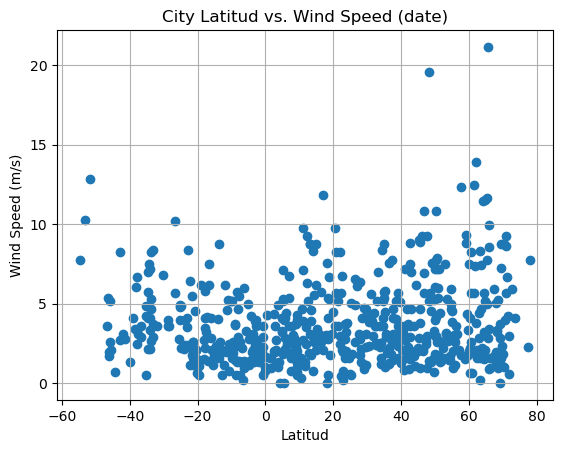

In [25]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values=city_data_df['Lat']
y_wind=city_data_df['Wind Speed']
plt.scatter(x_values,y_wind)
plt.title('City Latitud vs. Wind Speed (date)')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
#regress_values= x_values * slope + intercept


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,-17.64,90,7,1.58,CA,1681071228
2,ilulissat,69.2167,-51.1000,-2.99,86,100,0.00,GL,1681071480
3,iqaluit,63.7506,-68.5145,-18.15,65,20,4.63,CA,1681071480
6,komsomolskiy,40.4272,71.7189,14.40,41,100,2.06,UZ,1681071480
11,kirensk,57.7853,108.1119,-6.93,94,100,1.75,RU,1681071481


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[(city_data_df['Lat']<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sao joao da barra,-21.6403,-41.0511,23.05,89,100,5.49,BR,1681071480
4,castro,-24.7911,-50.0119,19.57,85,64,2.21,BR,1681071256
5,kaeo,-35.1000,173.7833,18.68,92,34,4.83,NZ,1681071480
7,vaini,-21.2000,-175.2000,28.09,78,20,1.54,TO,1681071481
8,carnarvon,-24.8667,113.6333,21.65,65,23,4.86,AU,1681071481


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7493569843078953


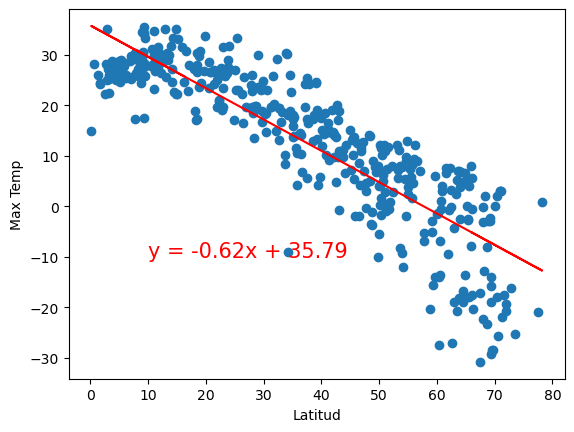

In [40]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#floats
x_values= northern_hemi_df['Lat'].astype('float')
y_values= northern_hemi_df['Max Temp'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()


The r-value is: 0.4887488943949689


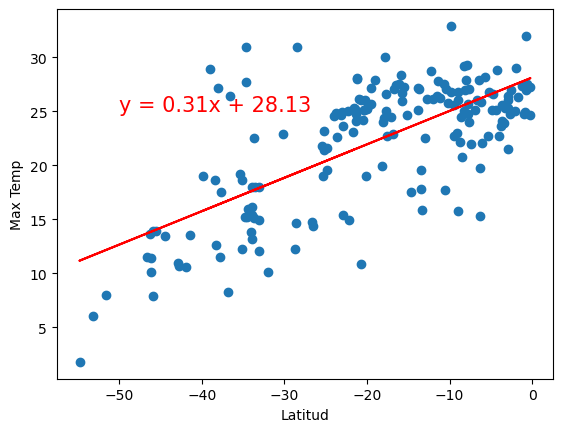

In [39]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
#floats
x_values= southern_hemi_df['Lat'].astype('float')
y_values= southern_hemi_df['Max Temp'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.108873104538103


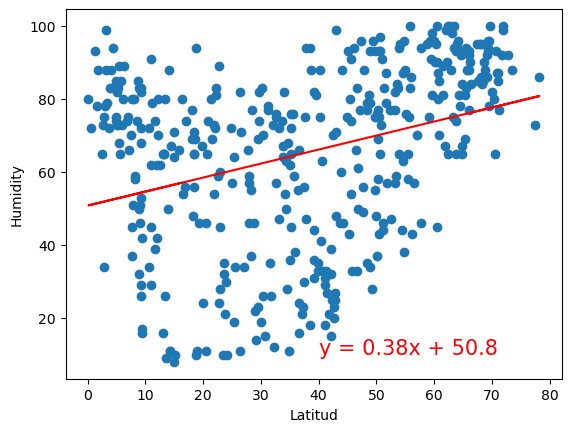

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
#floats
x_values= northern_hemi_df['Lat'].astype('float')
y_values= northern_hemi_df['Humidity'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Humidity")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

The r-value is: 0.11414784954394518


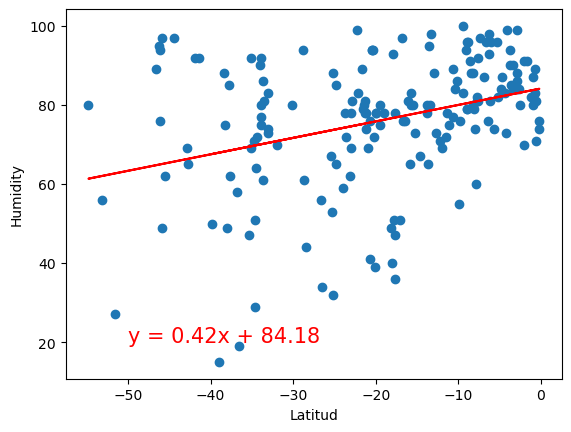

In [43]:
# Southern Hemisphere
# YOUR CODE HERE
#floats
x_values= southern_hemi_df['Lat'].astype('float')
y_values= southern_hemi_df['Humidity'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.014602620751953831


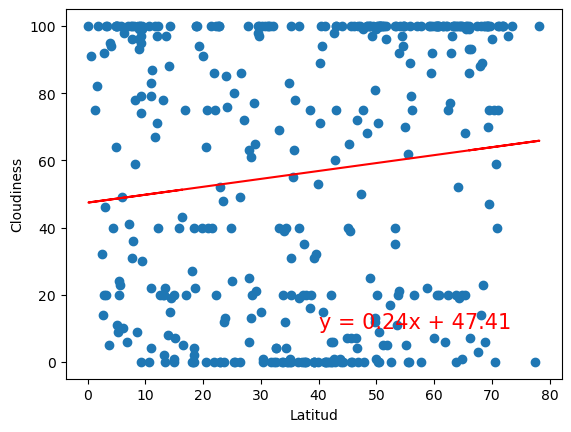

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
#floats
x_values= northern_hemi_df['Lat'].astype('float')
y_values= northern_hemi_df['Cloudiness'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

The r-value is: 0.07017659349512007


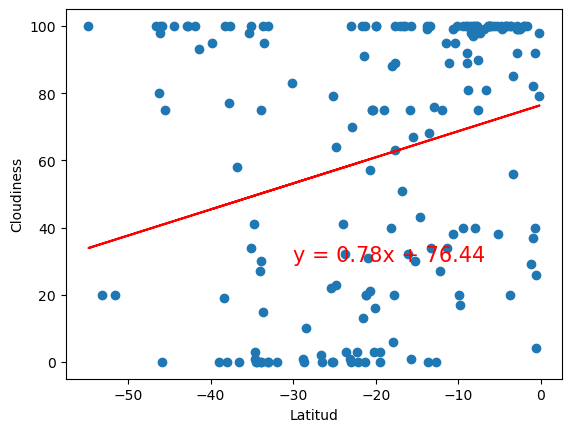

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
#floats
x_values= southern_hemi_df['Lat'].astype('float')
y_values= southern_hemi_df['Cloudiness'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02656822823108297


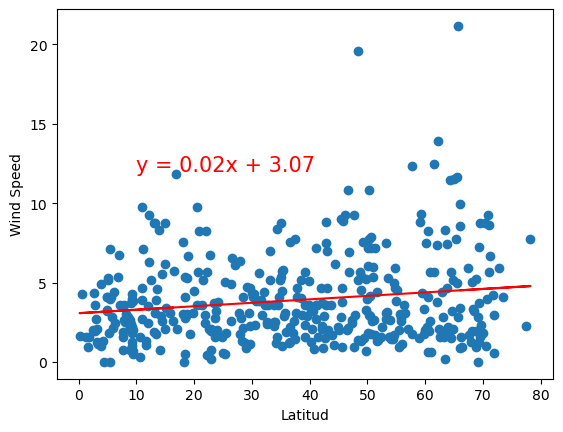

In [46]:
# Northern Hemisphere
# YOUR CODE HERE
#floats
x_values= northern_hemi_df['Lat'].astype('float')
y_values= northern_hemi_df['Wind Speed'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

The r-value is: 0.16464666430152453


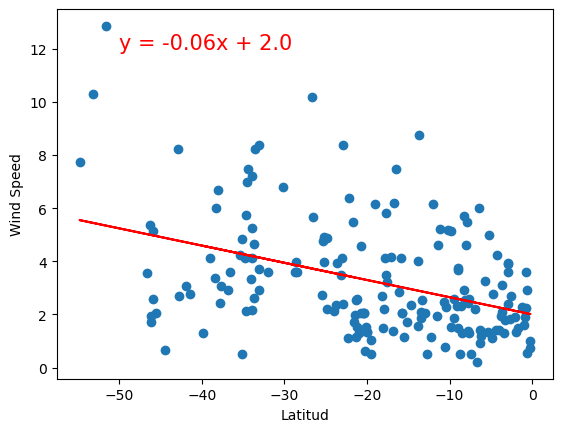

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
#floats
x_values= southern_hemi_df['Lat'].astype('float')
y_values= southern_hemi_df['Wind Speed'].astype('float')
#Run linear regression
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values= x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#Plot regression line
plt.plot(x_values,regress_values,"r-")

#Label plot
plt.xlabel("Latitud")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
#R value
print(f"The r-value is: {rvalue**2}")
#Show Plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE